In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [4]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

In [7]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Loop over the line several times to generate the subphrases
    for i in range(1, len(token_list)):

        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]

        # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [13]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [17]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']


In [24]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


In [26]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  4  2 66  8 67 68]
decoded to text: ['in the town of athy one']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 69


In [36]:
# Build the model
model = Sequential([
          Embedding(total_words, 64, input_length=max_sequence_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_2 (Bidirecti  (None, 40)                13600     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 263)               10783     
                                                                 
Total params: 41215 (161.00 KB)
Trainable params: 41215 (161.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
15/15 [==============================] - 8s 10ms/step - loss: 5.5701 - accuracy: 0.0110
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5501 - accuracy: 0.0442
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5095 - accuracy: 0.0574
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.3793 - accuracy: 0.0530
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1751 - accuracy: 0.0464
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0764 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0372 - accuracy: 0.0552
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0036 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9672 - accuracy: 0.0574
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9295 - accuracy: 0.0552
Epoch 11

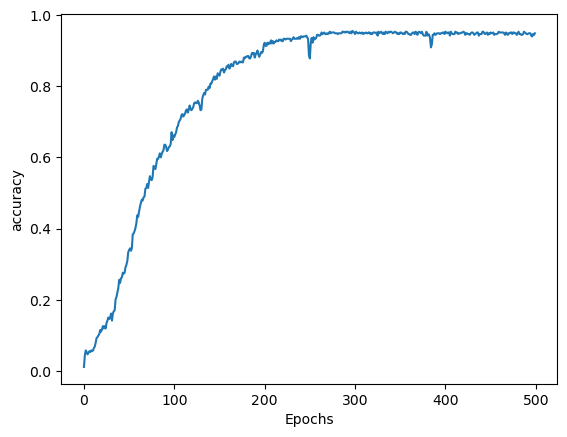

In [38]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# Generating Text

In [40]:
# Define seed text
seed_text = "Nicolas went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 51ms/step
Nicolas went to Dublin that left til little milliner further milliner milliner we miss glisten fall glisten glisten further ball ball ball glisten glisten were of punch the kerrigan milliner ladies was painted painted painted tea and miss glisten hullabaloo glisten hoops hoops hoops hoops hoops hoops hoops tea the glisten fall further girls and entangled boys in ask hearty again a jig jig jig man weeks spent spent spent relations relations a jig ask ask further soon weeks dublin relations relations relations relations a whirligig call call nonsense might ask ask rose further a rose rose rose further a jig acres their nonsense


# Trop de répétition avec le précédent code. Amélioration avec le code suivant :

In [49]:
# Define seed text
seed_text = "Nicolas  went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):
    # Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
  if predicted != 0:

        # Look up the word associated with the index. 
      output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
      seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 36ms/step
Nicolas  went to Dublin odaly that happened terrance mccarthy fall glisten mccarthy right new ball ball together went and brooks call fall introduction academy again a whirligig cask phelim might rose ask rose water sure round weeks to a wall ask wall entangled free mchugh wall further i acres whirligig hullabaloo academy ribbons brooks ask call call academy red as ask a rose call whirligig ten much a whirligig both weeks at me a nonsense nonsense much brooks call wall further academy a call jig ask call entangled water in ground ask hearty ball the reel weeks they got a acres call of ground
